In [1]:
#dependencies
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#variables
n = 10000
epsillon = 0.05
probabilities = [.25, .5, .75, .1, .15]

In [3]:
class bandit_class:
    """
    bandit class
    """
    def __init__(self, prob):
        self.prob = prob
        self.n = 0
        self.value = 0
        
    def pull(self):
        return np.random.random() < self.prob
    
    def update(self, x):
        self.n += 1
        self.value = (1/self.n * (x - self.value)) + self.value
        
        

In [4]:
def experiment(n, epsillon, probabilities, plot = 0):
        
    exploit = 0
    explore = 0
    epsilon_rewards = []
    greedy_rewards = []
    random_rewards = []
    
    #eps greedy
    bandits = [bandit_class(i) for i in probabilities]
    current_reward = 0
    for i in range(n):
        
        #get max value
        max_arm = np.argmax([i.value for i in bandits])
        
        #if explore pick non optimal action
        if np.random.random() < epsillon:
            options = [i for i in range(len(bandits))]
            del options[max_arm]
            selection = np.random.choice(options)
            explore += 1
        else:
            selection = max_arm
            exploit += 1
            
        #pull selection
        reward = bandits[selection].pull()
        
        #update selection
        bandits[selection].update(reward)
        
        
        #update running reward
        current_reward += reward
        epsilon_rewards.append(current_reward)
        
    #greedy
    bandits = [bandit_class(i) for i in probabilities]
    current_reward = 0
    for i in range(n):
        
        #get max value
        selection = np.argmax([i.value for i in bandits])
            
        #pull selection
        reward = bandits[selection].pull()
        
        #update selection
        bandits[selection].update(reward)        
        
        #update running reward
        current_reward += reward
        greedy_rewards.append(current_reward)
        
    #random
    bandits = [bandit_class(i) for i in probabilities]
    current_reward = 0
    for i in range(n):
        
        #randomly select arm
        options = [i for i in range(len(bandits))]
        selection = np.random.choice(options)
            
        #pull selection
        reward = bandits[selection].pull()
        
        #update selection
        bandits[selection].update(reward)        
        
        #update running reward
        current_reward += reward
        random_rewards.append(current_reward)
        
    if plot:
        #plot results
        print("explore:", explore)
        print("exploit:", exploit)
        plt.plot(epsilon_rewards, label = 'epsilon')
        plt.plot(greedy_rewards, label = 'greedy')
        plt.plot(random_rewards, label = 'random')  
        plt.legend()
        plt.show()
    
    return epsilon_rewards[-1], greedy_rewards[-1], random_rewards[-1]


explore: 521
exploit: 9479


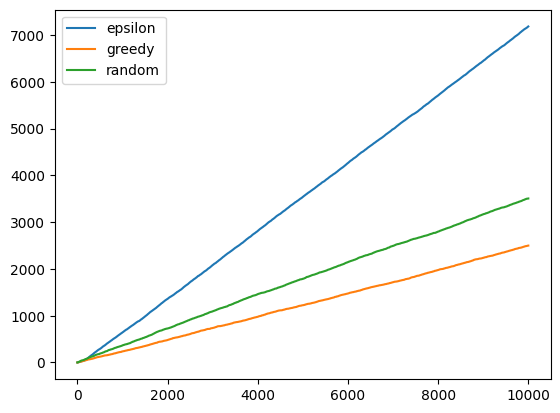

(7182, 2499, 3506)

In [5]:
experiment(n, epsillon, probabilities, plot = 1)

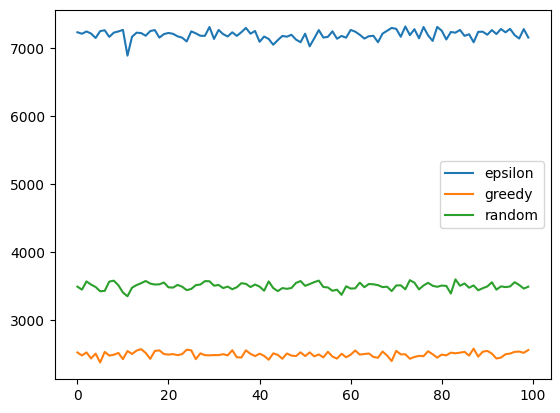

In [6]:
def multiple_runs(n):
    epsilon_rewards = []
    greedy_rewards = []
    random_rewards = []
    for i in range(n):
        eps, greed, rand = experiment(10000, 0.05, probabilities, plot = 0)   
        
        epsilon_rewards.append(eps)
        greedy_rewards.append(greed)
        random_rewards.append(rand)
    
    #plot results
    plt.plot(epsilon_rewards, label = 'epsilon')
    plt.plot(greedy_rewards, label = 'greedy')
    plt.plot(random_rewards, label = 'random')  
    plt.legend()
    plt.show()   
    
multiple_runs(100)